In [1]:
import numpy as np #import numpy
import pandas as pd #import pandas
import matplotlib.pyplot as plt #import matplotlib

%matplotlib inline 
from yellowbrick.features import Rank2D #A two-dimensional ranking of features
from yellowbrick.style import set_palette #Color palettes are discrete color lists
from yellowbrick.features import ParallelCoordinates  #vertical axis color visualization
import seaborn as sns #import seaborn for visualization
from sklearn.preprocessing import StandardScaler #importing stanadard scalar
from sklearn.ensemble import RandomForestRegressor #random forest regression
from sklearn.model_selection import train_test_split #split the data in to train and test
from sklearn.metrics import mean_absolute_error as mae #mean absolute
from sklearn.decomposition import PCA
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
import math 
from sklearn.linear_model import Ridge


In [2]:
#location of data file
floc=r'C:\Users\rdanda\OneDrive - Microsoft\Documents\Bellevue\DSC 550 Mining Data\week-6\vehiclessmall10801.csv'

In [3]:
df=pd.read_csv(floc)

In [4]:
#df.head()

In [5]:
removecolumns =['url', 'region_url', 'title_status', 'vin', 'county','size', 'image_url', 'lat','long']
df = df.drop(columns = removecolumns)

In [6]:
#df.head()

In [7]:
df = df.dropna()
#df.head(5)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2346 entries, 4 to 9932
Data columns (total 16 columns):
id              2346 non-null object
region          2346 non-null object
price           2346 non-null int64
year            2346 non-null object
manufacturer    2346 non-null object
model           2346 non-null object
condition       2346 non-null object
cylinders       2346 non-null object
fuel            2346 non-null object
odometer        2346 non-null object
transmission    2346 non-null object
drive           2346 non-null object
type            2346 non-null object
paint_color     2346 non-null object
description     2346 non-null object
state           2346 non-null object
dtypes: int64(1), object(15)
memory usage: 311.6+ KB


In [9]:
df["year"] = pd.to_numeric(df["year"])
df["odometer"] = pd.to_numeric(df["odometer"])
df["price"] = pd.to_numeric(df["price"])
        

In [10]:
df.describe(include=['O'])

,id,region,manufacturer,model,condition,cylinders,fuel,transmission,drive,type,paint_color,description,state
count,2346,2346,2346,2346,2346,2346,2346,2346,2346,2346,2346,2346,2346
unique,2346,49,35,1115,6,8,5,3,3,13,12,2253,14
top,7190065969,orlando,chevrolet,silverado 1500,excellent,4 cylinders,gas,automatic,fwd,sedan,white,2015 Chevrolet Silverado 1500 Crew Cab 4x4 LIF...,fl
freq,1,273,368,39,1162,867,2176,2090,992,701,551,6,837


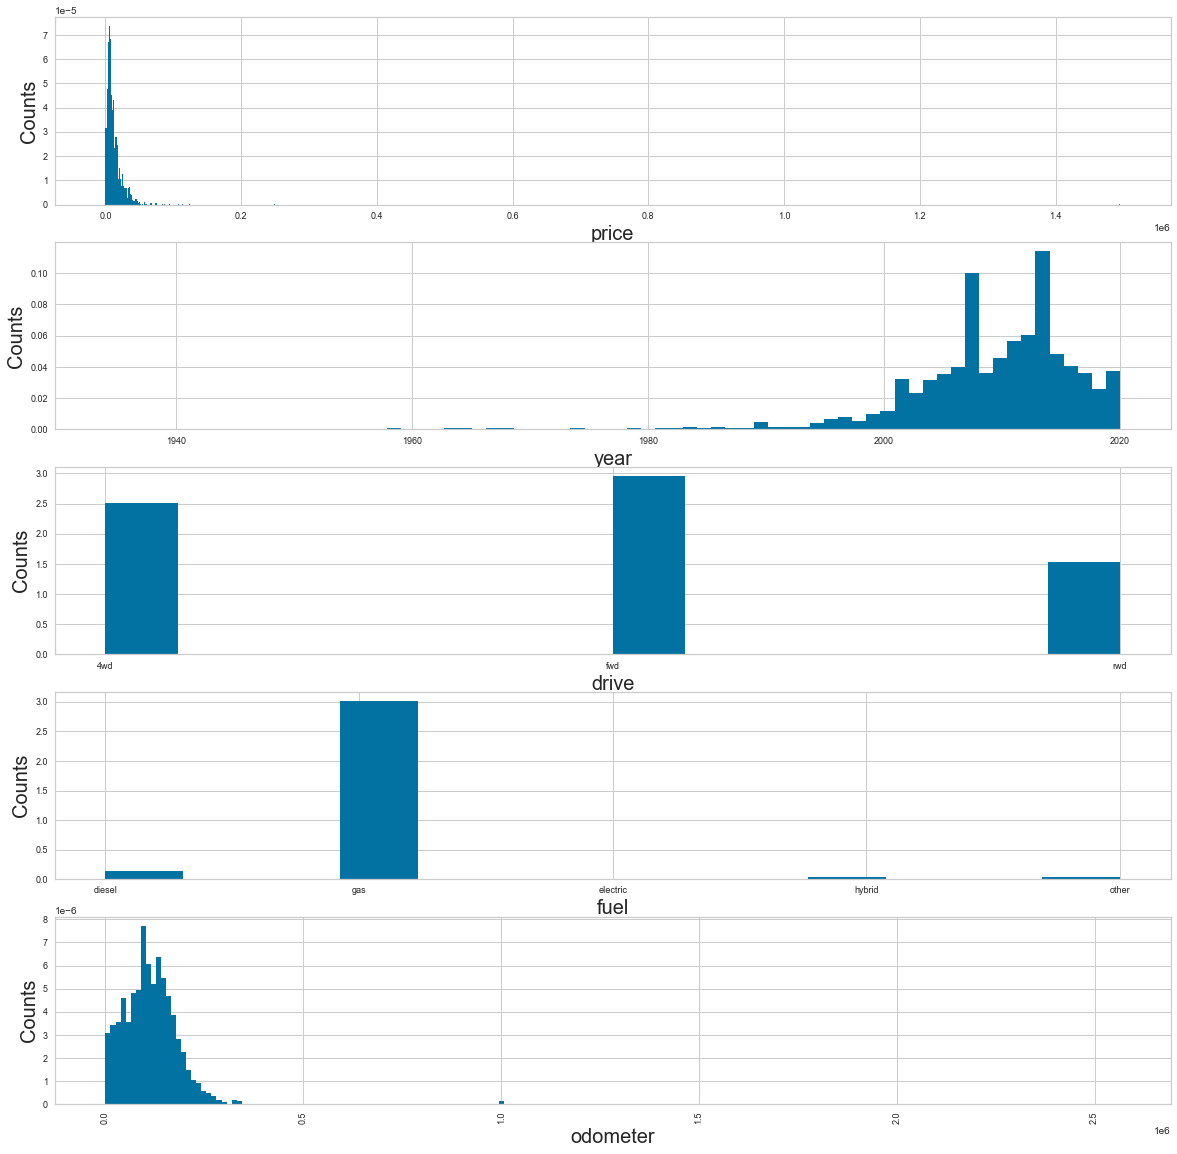

In [11]:
#histogram
plt.rcParams['figure.figsize'] = (20, 20) #setting the figure size 20 by 20
fig, axes = plt.subplots(nrows = 5, ncols = 1) #Subplotting with 4 rows by 1 columns
num_features = ['price', 'year', 'drive','fuel','odometer'] #Getting the features 'price', 'year', 'odometer' in to list
xaxes = num_features #assingining the number features to x axis
yaxes = ['Counts', 'Counts', 'Counts','Counts','Counts'] #assinging the counts as y axis for all 4 plots

# draw histograms
axes = axes.ravel() #getting the flattern axes to value 
for idx, ax in enumerate(axes):# Enumerate the values of axes
    ax.hist(df[num_features[idx]].dropna(),bins='auto',density =True) #create histogram with xaxis and bins 20
    ax.set_xlabel(xaxes[idx], fontsize=20) #set xlable with the same value of histogram x values
    ax.set_ylabel(yaxes[idx], fontsize=20) #set ylables as counts for 0-4 index's with size 20
    ax.tick_params(axis='both', labelsize=9) #set the appearance of ticks to both and size 7 
    plt.xticks(rotation='vertical')

plt.show() #showin the plots(all 4)

### we have more vehicles for years in 2010 to 2015, mostly skwed towords the last 20years
### mostly front wheel drive follwoed by 4w drive and r wheel drive
### most vehicles are powered by gas followed by disesl in the distanct low

In [12]:
df['condition'].unique() #finding unique values

array(['good', 'fair', 'excellent', 'like new', 'salvage', 'new'],
      dtype=object)

In [13]:
df.drive.unique()#finding unique values

array(['4wd', 'fwd', 'rwd'], dtype=object)

In [14]:
df.cylinders.unique()#finding unique values

array(['8 cylinders', '6 cylinders', '4 cylinders', '5 cylinders',
       '10 cylinders', 'other', '3 cylinders', '12 cylinders'],
      dtype=object)

In [15]:
df.paint_color.unique()#finding unique values

array(['white', 'grey', 'custom', 'silver', 'blue', 'brown', 'purple',
       'red', 'black', 'green', 'orange', 'yellow'], dtype=object)

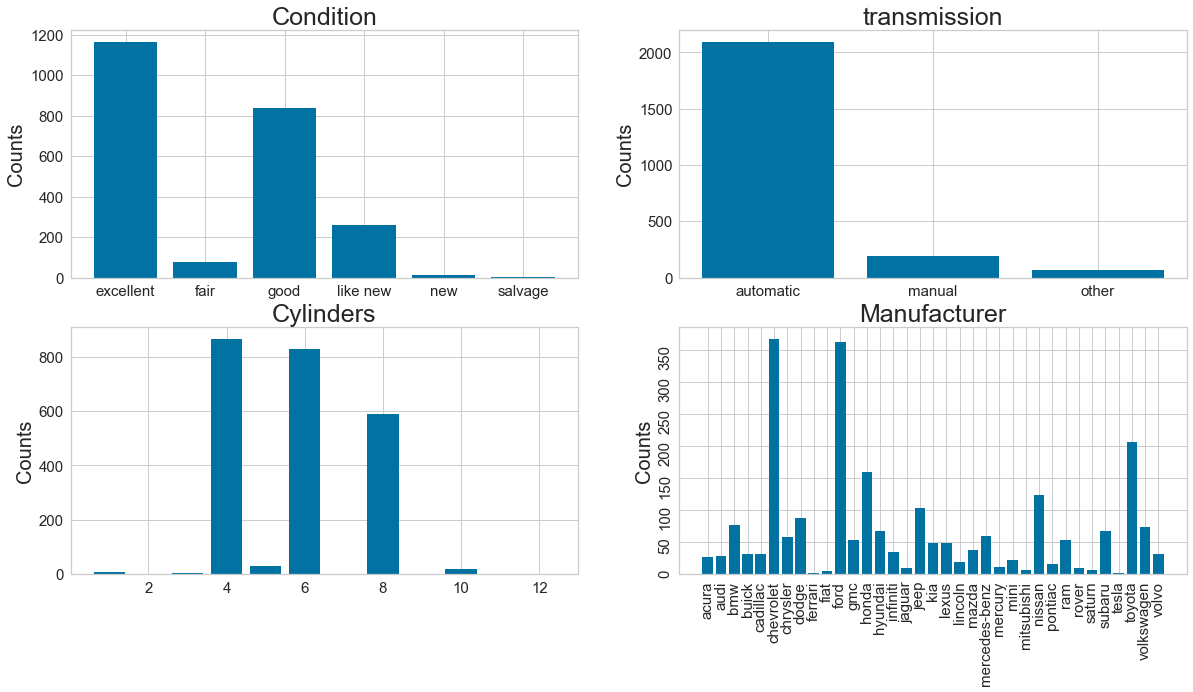

In [16]:
plt.rcParams['figure.figsize'] = (20, 10) #set figure size to 20 by 10
fig, axes = plt.subplots(nrows = 2, ncols = 2)#subplots with 2 by 2
#groupedby for condition values in x and y for counts
X_condition = df.groupby('condition').size().reset_index(name='Counts')['condition']
Y_condition = df.groupby('condition').size().reset_index(name='Counts')['Counts']
# make the bar plot
axes[0, 0].bar(X_condition, Y_condition) #bar graph at 0,0 axes for condition values yes and no
axes[0, 0].set_title('Condition', fontsize=25) #title set as condition
axes[0, 0].set_ylabel('Counts', fontsize=20) #Ylabel as 'count'
axes[0, 0].tick_params(axis='both', labelsize=15) ##set the appearance of ticks to both and size 15 

#groupedby for transmission values in x and y for counts
X_transmission = df.groupby('transmission').size().reset_index(name='Counts')['transmission']
Y_transmission = df.groupby('transmission').size().reset_index(name='Counts')['Counts']
# make the bar plot
axes[0, 1].bar(X_transmission, Y_transmission) #bar graph at 0,0 axes for condition values yes and no
axes[0, 1].set_title('transmission', fontsize=25) #title set as transmission
axes[0, 1].set_ylabel('Counts', fontsize=20) #Ylabel as 'count'
axes[0, 1].tick_params(axis='both', labelsize=15) ##set the appearance of ticks to both and size 15 


#replace condition values with of 1 to yes and 0 to no grouped by servived values in x and y for counts
X_cylinders = df.replace({'cylinders': {'8 cylinders':8,'6 cylinders':6,'4 cylinders':4,'5 cylinders':5,
       '10 cylinders':10, 'other':1,'3 cylinders':3, '12 cylinders':12}}).groupby('cylinders').size().reset_index(name='Counts')['cylinders']
Y_cylinders = df.replace({'cylinders': {'8 cylinders':8,'6 cylinders':6,'4 cylinders':4,'5 cylinders':5,
       '10 cylinders':10, 'other':1,'3 cylinders':3, '12 cylinders':12}}).groupby('cylinders').size().reset_index(name='Counts')['Counts']
# make the bar plot
axes[1, 0].bar(X_cylinders, Y_cylinders) #bar graph at 0,0 axes for condition values yes and no
axes[1, 0].set_title('Cylinders', fontsize=25) #title set as condition
axes[1, 0].set_ylabel('Counts', fontsize=20) #Ylabel as 'count'
axes[1, 0].tick_params(axis='both', labelsize=15) ##set the appearance of ticks to both and size 15 

X_manufacturer = df.groupby('manufacturer').size().reset_index(name='Counts')['manufacturer']
Y_manufacturer = df.groupby('manufacturer').size().reset_index(name='Counts')['Counts']
# make the bar plot
axes[1, 1].bar(X_manufacturer, Y_manufacturer) #bar graph at 0,0 axes for condition values yes and no
axes[1, 1].set_title('Manufacturer', fontsize=25) #title set as condition
axes[1, 1].set_ylabel('Counts', fontsize=20) #Ylabel as 'count'
axes[1, 1].tick_params(axis='both', labelsize=15,rotation=90) ##set the appearance of ticks to both and size 15 


### It appears there are more excelent and good values vehicles
### Cehvy & Ford vehicles are sold high in used vehicles


In [17]:
#set up the figure size
plt.rcParams['figure.figsize'] = (9, 9)

In [18]:
num_features1 = ['price', 'year', 'odometer'] #features for correlation analysis

In [19]:
X = df[num_features1].to_numpy()

In [20]:
#X

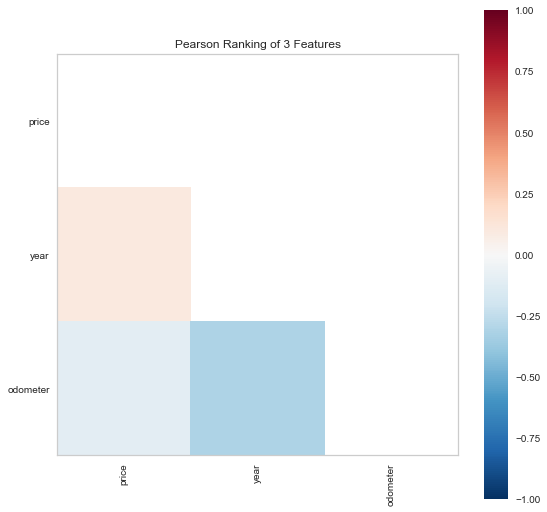

In [21]:
# instantiate the visualizer with the Covariance ranking algorithm using Pearson
visualizer = Rank2D(features=num_features1, algorithm='pearson')
visualizer.fit(X)                # Fit the data to the visualizer
visualizer.transform(X)             # Transform the data
visualizer.poof(outpath=r'C:\Users\rdanda\OneDrive - Microsoft\Documents\Bellevue\DSC 550 Mining Data\week-6\pcoordsato.png') # Draw/show/poof the data
plt.show()

### Negative corrlation btw year and odometer (understandaby  high millage for older years)
### Positive correlation btw price and year

In [22]:
df.paint_color = pd.Categorical(df.paint_color) #converting color to categorical

In [23]:
df['color_code'] = df.paint_color.cat.codes #create color code instead of text

In [24]:
#df.head()

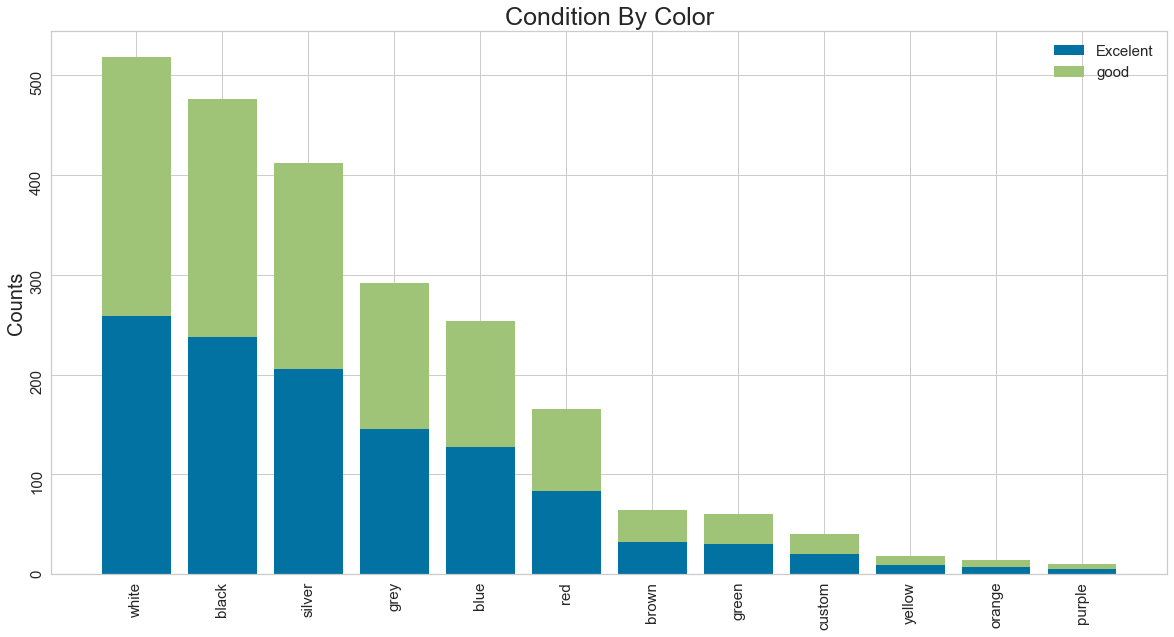

In [25]:
# stacked bar charts to compare Excelent and Good condition vehicles by color 
#set up the figure size

plt.rcParams['figure.figsize'] = (20, 10)

# make subplots (just one here)
fig, axes = plt.subplots(nrows =1, ncols =1)
#get the counts of excelt and good condition vehicles
condition_excellent = df[df['condition']=='excellent']['paint_color'].value_counts()
condition_good = df[df['condition']=='good']['paint_color'].value_counts()
condition_good = condition_excellent.reindex(index = condition_good.index) #reindex with  good condition values
# make the bar plot
p1 = axes.bar(condition_excellent.index, condition_excellent.values) #create bar graph with excelent values
p2 = axes.bar(condition_good.index, condition_good.values, bottom=condition_good.values) #create bar graph with good by having excelent at the bottom of the stacked chart
axes.set_title('Condition By Color', fontsize=25) #title at 0,0 axis
axes.set_ylabel('Counts', fontsize=20)#ylable count
axes.tick_params(axis='both', labelsize=15,rotation=90) #ticks on both axis with size 15
axes.legend((p1[0], p2[0]), ('Excelent', 'good'), fontsize = 15) #legend on Ecxcelent and good



### White & black colors are dominant in excelent and good vehicle conditions followed by silver

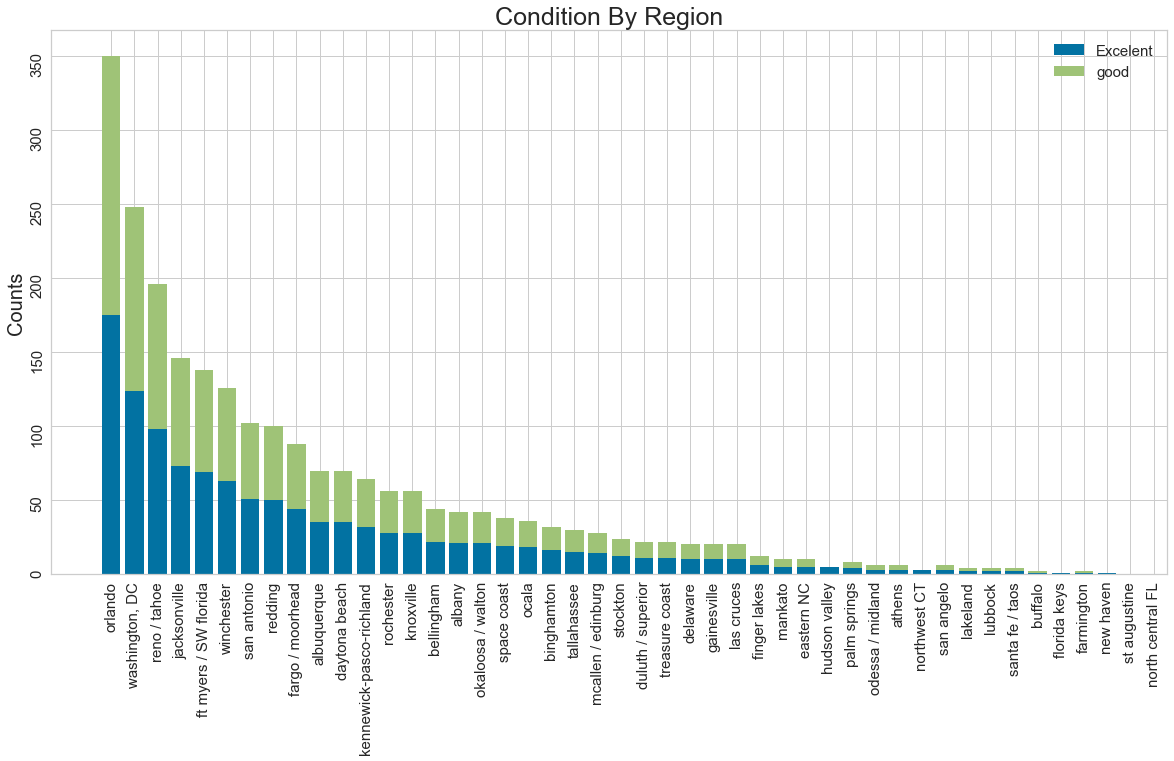

In [26]:
plt.rcParams['figure.figsize'] = (20, 10)

# make subplots (just one here)
fig, axes = plt.subplots(nrows =1, ncols =1)
#get the counts of excelt and good condition vehicles
condition_excellent = df[df['condition']=='excellent']['region'].value_counts()
condition_good = df[df['condition']=='good']['region'].value_counts()
condition_good = condition_excellent.reindex(index = condition_good.index) #reindex with  good condition values
# make the bar plot
p1 = axes.bar(condition_excellent.index, condition_excellent.values) #create bar graph with excelent values
p2 = axes.bar(condition_good.index, condition_good.values, bottom=condition_good.values) #create bar graph with good by having excelent at the bottom of the stacked chart
axes.set_title('Condition By Region', fontsize=25) #title at 0,0 axis
axes.set_ylabel('Counts', fontsize=20)#ylable count
axes.tick_params(axis='both', labelsize=15,rotation=90) #ticks on both axis with size 15
axes.legend((p1[0], p2[0]), ('Excelent', 'good'), fontsize = 15) #legend on Ecxcelent and good

### Orlando washington DC has more excelent cars followed by reno/tahoe

In [27]:
#Step 11- Fill in missing values and eliminate feature

In [28]:
#create a function that takes data frame column and replace missing values with median values
def fill_na_median(df, inplace=True):
    return df.fillna(df.median(), inplace=inplace) #return median values of the column beeing passed


In [29]:
fill_na_median(df['odometer'])

In [30]:
df['odometer'].describe()

count    2.346000e+03
mean     1.175334e+05
std      1.060330e+05
min      0.000000e+00
25%      6.800000e+04
50%      1.091445e+05
75%      1.530000e+05
max      2.564237e+06
Name: odometer, dtype: float64

In [31]:
def fill_na_most(df, inplace=True): #defing the function to replace missing with most occured value 'sedan'
    return df.fillna('sedan', inplace=inplace)

In [32]:
fill_na_most(df['type'])

In [33]:
df['type'].describe()

count      2346
unique       13
top       sedan
freq        701
Name: type, dtype: object

In [34]:
# log-transformation
def log_transformation(df): #define a function to return log1p(natural logarithmic value of x + 1) values for given df
    return df.apply(np.log1p)

In [35]:
df['price_log1p'] = log_transformation(df['price'])

In [36]:
df.describe()

,price,year,odometer,color_code,price_log1p
count,2.346000e+03,2346.000000,2.346000e+03,2346.000000,2346.000000
mean,1.291825e+04,2009.134271,1.175334e+05,5.586530,8.888144
std,3.296848e+04,7.830200,1.060330e+05,4.008569,1.600784
min,0.000000e+00,1934.000000,0.000000e+00,0.000000,0.000000
25%,4.990000e+03,2006.000000,6.800000e+04,1.000000,8.515392
50%,8.950000e+03,2011.000000,1.091445e+05,6.000000,9.099521
75%,1.587500e+04,2014.000000,1.530000e+05,9.000000,9.672560
max,1.495000e+06,2020.000000,2.564237e+06,11.000000,14.217637


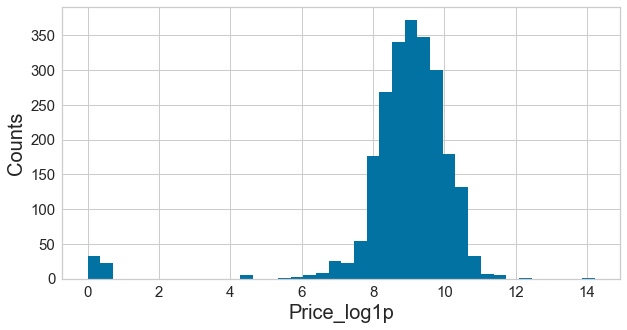

In [37]:
#Step 12 - adjust skewed data (fare)
plt.rcParams['figure.figsize'] = (10, 5) #set figure size to 10,5
plt.hist(df['price_log1p'], bins=40) #check the distribution using histogram
plt.xlabel('Price_log1p', fontsize=20) #check xlabel with fontsize 20
plt.ylabel('Counts', fontsize=20) #Y axis label 
plt.tick_params(axis='both', labelsize=15) #ticks on both axis and label size 15
#plt.show()

In [38]:
#df.head()

In [39]:
 df.type = pd.Categorical(df.type) #converting type to categorical

In [40]:
df.region = pd.Categorical(df.region) #converting region to categorical

In [41]:
df.manufacturer =pd.Categorical(df.manufacturer) #converting type to categorical

In [42]:
 df.model =pd.Categorical(df.model) #converting type to categorical

In [43]:
 df.condition =pd.Categorical(df.condition) #converting type to categorical

In [44]:
  df.cylinders =pd.Categorical(df.cylinders) #converting type to categorical

In [45]:
   df.fuel =pd.Categorical(df.fuel) #converting type to categorical

In [46]:
    df.transmission =pd.Categorical(df.transmission) #converting type to categorical

In [47]:
 df.drive =pd.Categorical(df.drive) #converting type to categorical

In [48]:
# converting catagorical values to numbers (type of vehicles)
df['type_code'] = df.type.cat.codes

In [49]:
#  converting catagorical values to numbers (region of vehicles)
df['region_code'] = df.region.cat.codes

In [50]:
#  converting catagorical values to numbers (manufacturer of vehicles)
df['manufacturer_code'] = df.manufacturer.cat.codes

In [51]:
 #converting catagorical values to numbers (model of vehicles)
df['model_code'] = df.model.cat.codes

In [52]:
 #converting catagorical values to numbers (condition of vehicles)
df['condition_code'] = df.condition.cat.codes

In [53]:
 #converting catagorical values to numbers (cylinders of vehicles)
df['cylinders_code'] = df.cylinders.cat.codes

In [54]:
 #converting catagorical values to numbers (fuel of vehicles)
df['fuel_code'] = df.fuel.cat.codes

In [55]:
 #converting catagorical values to numbers (transmission of vehicles)
df['transmission_code'] = df.transmission.cat.codes

In [56]:
 #converting catagorical values to numbers (drive of vehicles)
df['drive_code'] = df.drive.cat.codes

In [57]:
#Columns with too many Null Values
NotAvailable_val = df.isna().sum() #find all the columns with null values
def natavailable_func(na, threshold = .4): #only select variables that passees the threshold
    columns_passed = [] #define the empty list
    for i in na.keys(): #loop through the columns
        if na[i]/df.shape[0]<threshold: #if the shape is grater than 40% then append the values
            columns_passed.append(i) #append the colunm to the list
    return columns_passed #return the columns


In [58]:
#get the columns that are not having too many null values (>40%)
df_clean = df[natavailable_func(NotAvailable_val)] 
df_clean.columns

Index(['id', 'region', 'price', 'year', 'manufacturer', 'model', 'condition',
       'cylinders', 'fuel', 'odometer', 'transmission', 'drive', 'type',
       'paint_color', 'description', 'state', 'color_code', 'price_log1p',
       'type_code', 'region_code', 'manufacturer_code', 'model_code',
       'condition_code', 'cylinders_code', 'fuel_code', 'transmission_code',
       'drive_code'],
      dtype='object')

<AxesSubplot:>

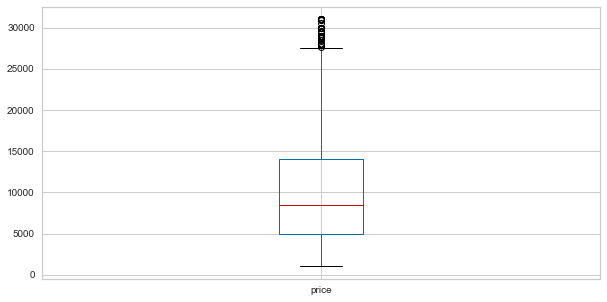

In [59]:
#Identify outliner if any in the price
df_clean = df_clean[df_clean['price'].between(999.99, 250000)] # calclulating Inter Quartile Range
Q1 = df_clean['price'].quantile(0.25) #get 25%
Q3 = df_clean['price'].quantile(0.75) #get 75%
IQR = Q3 - Q1 #get the inter quartile by taking the differnece btw 3 and 1 quarters
# get only Values between Q1-1.5IQR and Q3+1.5IQR
df_filtered = df_clean.query('(@Q1 - 1.5 * @IQR) <= price <= (@Q3 + 1.5 * @IQR)')
df_filtered.boxplot('price')  #showing using boxplot

<AxesSubplot:>

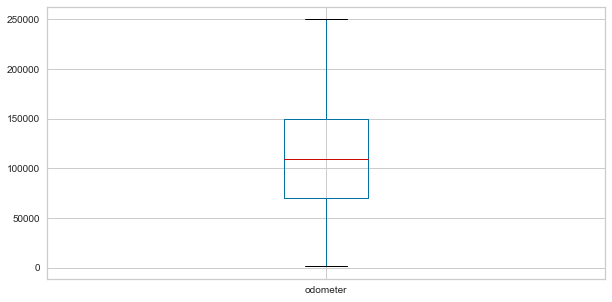

In [60]:
#Identify outliner if any in the millage
df_clean = df_clean[df_clean['odometer'].between(999.99, 250000)] # Computing IQR
Q1 = df_clean['odometer'].quantile(0.25)
Q3 = df_clean['odometer'].quantile(0.75)
IQR = Q3 - Q1
# Filtering Values between Q1-1.5IQR and Q3+1.5IQR
df_filtered = df_clean.query('(@Q1 - 1.5 * @IQR) <= price <= (@Q3 + 1.5 * @IQR)')
df_filtered.boxplot('odometer')

<AxesSubplot:>

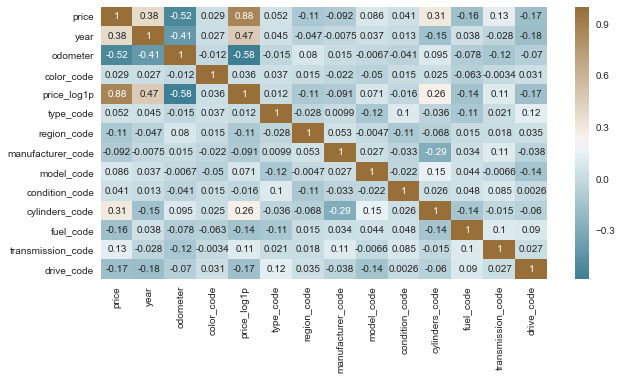

In [61]:
# calculate correlation matrix on the cleaned data
corr = df_clean.corr()# plot the heatmap
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(220, 50, as_cmap=True))

In [62]:
df_clean.columns

Index(['id', 'region', 'price', 'year', 'manufacturer', 'model', 'condition',
       'cylinders', 'fuel', 'odometer', 'transmission', 'drive', 'type',
       'paint_color', 'description', 'state', 'color_code', 'price_log1p',
       'type_code', 'region_code', 'manufacturer_code', 'model_code',
       'condition_code', 'cylinders_code', 'fuel_code', 'transmission_code',
       'drive_code'],
      dtype='object')

In [63]:
removecolumns =['price_log1p','id','region', 'manufacturer', 'model', 'condition', 'cylinders','fuel', 'transmission', 'drive','type','paint_color', 'description', 'state']
df_clean = df_clean.drop(columns = removecolumns)

In [64]:
df_clean = pd.get_dummies(df_clean, drop_first=True)
print(df_clean.columns)
df_clean

Index(['price', 'year', 'odometer', 'color_code', 'type_code', 'region_code',
       'manufacturer_code', 'model_code', 'condition_code', 'cylinders_code',
       'fuel_code', 'transmission_code', 'drive_code'],
      dtype='object')


,price,year,odometer,color_code,type_code,region_code,manufacturer_code,model_code,condition_code,cylinders_code,fuel_code,transmission_code,drive_code
5,13995,2012,188406,5,10,8,10,401,2,5,2,0,0
6,7995,2010,108124,5,0,8,5,355,2,3,2,0,0
7,8995,2011,178054,10,0,8,5,1006,2,5,2,0,0
8,10995,2014,170259,10,0,8,10,387,2,5,2,0,0
10,10995,2011,210865,9,10,8,5,868,2,6,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9919,21995,2016,177364,10,8,17,10,944,0,6,2,0,0
9920,44995,2020,14361,0,8,17,5,868,0,6,2,0,0
9921,24995,2014,77541,1,8,17,32,1021,0,6,2,0,0
9922,1500,1998,210000,0,6,17,16,219,0,3,2,0,0


In [65]:
#hot encoding color code of the data frame
print(df_clean['color_code'].unique())
df_clean['color_code'] = pd.Categorical(df_clean['color_code'])
color_code_Type = pd.get_dummies(df_clean['color_code'], prefix = 'color_code')
color_code_Type.head()

[ 5 10  9  1  2  7  8  0  4  3  6 11]


,color_code_0,color_code_1,color_code_2,color_code_3,color_code_4,color_code_5,color_code_6,color_code_7,color_code_8,color_code_9,color_code_10,color_code_11
5,0,0,0,0,0,1,0,0,0,0,0,0
6,0,0,0,0,0,1,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,1,0
8,0,0,0,0,0,0,0,0,0,0,1,0
10,0,0,0,0,0,0,0,0,0,1,0,0


In [66]:
#hot encoding type_code code of the data frame
print(df_clean['type_code'].unique())
df_clean['type_code'] = pd.Categorical(df_clean['type_code'])
type_code_Type = pd.get_dummies(df_clean['type_code'], prefix = 'type_code')
type_code_Type.head()


[10  0  9  5  4  3  8 12  2 11  7  1  6]


,type_code_0,type_code_1,type_code_2,type_code_3,type_code_4,type_code_5,type_code_6,type_code_7,type_code_8,type_code_9,type_code_10,type_code_11,type_code_12
5,0,0,0,0,0,0,0,0,0,0,1,0,0
6,1,0,0,0,0,0,0,0,0,0,0,0,0
7,1,0,0,0,0,0,0,0,0,0,0,0,0
8,1,0,0,0,0,0,0,0,0,0,0,0,0
10,0,0,0,0,0,0,0,0,0,0,1,0,0


In [67]:
#hot encoding region_code code of the data frame
print(df_clean['region_code'].unique())
df_clean['region_code'] = pd.Categorical(df_clean['region_code'])
region_code_Type = pd.get_dummies(df_clean['region_code'], prefix = 'region_code')
region_code_Type.head()

[ 8  1 27 10  0 29 47 24  9 48 26  3 25 42 43 45 19  4 46 34 35 36 31 39
 40 44  7 11 22 41  6 13 14 37 15 16 18 21 28 30 32 33 20  2  5 12 23 17]


,region_code_0,region_code_1,region_code_2,region_code_3,region_code_4,region_code_5,region_code_6,region_code_7,region_code_8,region_code_9,...,region_code_39,region_code_40,region_code_41,region_code_42,region_code_43,region_code_44,region_code_45,region_code_46,region_code_47,region_code_48
5,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
10,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [68]:
#hot encoding region_code code of the data frame
print(df_clean['cylinders_code'].unique())
df_clean['cylinders_code'] = pd.Categorical(df_clean['cylinders_code'])
cylinders_code_Type = pd.get_dummies(df_clean['cylinders_code'], prefix = 'cylinders_code')
cylinders_code_Type.head()


[5 3 6 4 7 2 0]


,cylinders_code_0,cylinders_code_2,cylinders_code_3,cylinders_code_4,cylinders_code_5,cylinders_code_6,cylinders_code_7
5,0,0,0,0,1,0,0
6,0,0,1,0,0,0,0
7,0,0,0,0,1,0,0
8,0,0,0,0,1,0,0
10,0,0,0,0,0,1,0


In [69]:
df_clean = pd.concat([df_clean, cylinders_code_Type, region_code_Type, type_code_Type,color_code_Type], axis=1)
df_clean = df_clean.drop(columns=['cylinders_code', 'region_code', 'type_code','color_code'])
df_clean.head()

,price,year,odometer,manufacturer_code,model_code,condition_code,fuel_code,transmission_code,drive_code,cylinders_code_0,...,color_code_2,color_code_3,color_code_4,color_code_5,color_code_6,color_code_7,color_code_8,color_code_9,color_code_10,color_code_11
5,13995,2012,188406,10,401,2,2,0,0,0,...,0,0,0,1,0,0,0,0,0,0
6,7995,2010,108124,5,355,2,2,0,0,0,...,0,0,0,1,0,0,0,0,0,0
7,8995,2011,178054,5,1006,2,2,0,0,0,...,0,0,0,0,0,0,0,0,1,0
8,10995,2014,170259,10,387,2,2,0,0,0,...,0,0,0,0,0,0,0,0,1,0
10,10995,2011,210865,5,868,2,2,0,0,0,...,0,0,0,0,0,0,0,1,0,0


 ### Random forest model before applying the model on 15columns

In [70]:
# scaled the data using StandardScaler on price
Xo = df_clean.loc[1:1000, df_clean.columns != 'price']#all values except price to X
yo = df_clean.loc[1:1000, df_clean.columns == 'price']

In [71]:
yo = yo.values.flatten()

In [72]:
#creating random forest model to check the variables using price 
Xo_train, Xo_test, yo_train, yo_test = train_test_split(Xo, yo, test_size=.25, random_state=1) #split the data in to test and train with test size at 25%
sc = StandardScaler()
Xo_train = sc.fit_transform(Xo_train)
Xo_test = sc.transform(Xo_test)
modelo = RandomForestRegressor(random_state=2) #building the model b random forest method
modelo.fit(Xo_train, yo_train) #fitting the model using training data
predo = modelo.predict(Xo_test) #predicting the model using the test data

In [73]:
print('The mean absolute error',mae(yo_test, predo)) #mean absolute error of the model

The mean absolute error 2893.827402597402


In [74]:
print('Score of the model is ',modelo.score(Xo_test,yo_test)) #accuracy of the model based on train and test

Score of the model is  0.6889615728801413


### PCA to transform 88 to 3 comp

In [75]:
#PCA analysis

In [76]:
# scaled the data using StandardScaler on price
Xp = df_clean.loc[1:1000, df_clean.columns != 'price']#all values except price to X
#X = StandardScaler().fit_transform(X) #making the data zero mean and variance along each feature
#y = df_clean['price'] #actual price values while still retaining before standar scalor operation
yp = df_clean.loc[1:1000, df_clean.columns == 'price']

In [77]:
yp = yp.values.flatten()

In [78]:
#creating random forest model to check the variables using price 
Xp_train, Xp_test, yp_train, yp_test = train_test_split(Xp, yp, test_size=.25, random_state=0) #split the data in to test and train with test size at 25%
sc = StandardScaler()
Xp_train = sc.fit_transform(Xp_train)
Xp_test = sc.transform(Xp_test)

In [79]:
pca = PCA(n_components=4)
Xp_train = pca.fit_transform(Xp_train)
Xp_test = pca.transform(Xp_test)

In [80]:
explained_variance = pca.explained_variance_ratio_

In [81]:
explained_variance

array([0.07733869, 0.05874091, 0.05536627, 0.04819349])

In [82]:
pca = PCA(n_components=1)
Xp_train = pca.fit_transform(Xp_train)
Xp_test = pca.transform(Xp_test)

In [83]:
modelp = RandomForestRegressor(random_state=2) #building the model b random forest method
modelp.fit(Xp_train, yp_train) #fitting the model using training data
predp = modelp.predict(Xp_test) #predicting the model using the test data

In [84]:
print('The mean absolute error',mae(yp_test, predp)) #mean absolute error of the model

The mean absolute error 6923.427142857143


In [85]:
print('The mean price of the vehicle is',df_clean['price'].mean()) #mean vehicle price of all data set

The mean price of the vehicle is 12741.483094025012


In [86]:
print('Score of the model is ',modelp.score(Xp_test,yp_test)) #accuracy of the model based on train and test

Score of the model is  -0.5256584453711577


In [87]:
#Lasso Regression to reduce features

In [88]:
from sklearn.linear_model import Lasso
from sklearn.datasets import load_boston
from sklearn.preprocessing import StandardScaler


In [89]:
# Create features 
Xl = df_clean.loc[1:1000, df_clean.columns != 'price']#all values except price to X (features)


# Create target
yl = df_clean.loc[1:1000, df_clean.columns == 'price'] #lable data


In [90]:
#Standardize features
scaler = StandardScaler() #instance of a scalar
features_standardized = scaler.fit_transform(Xl) #fit the features to scalar


In [91]:
#Create lasso regression with alpha value
regression = Lasso(alpha=0.5) 


In [92]:
#Fit the linear regression
model = regression.fit(features_standardized, yl)
print(model)


Lasso(alpha=0.5)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 73129860.73472214, tolerance: 2445941.934028197
  positive)


In [93]:
col1=list(Xl.columns)
coef1=list(model.coef_)

In [94]:
print(model.intercept_)
print(model.coef_)

[11323.41967213]
[ 3.50668483e+03 -3.67457370e+03  5.08468261e+02 -7.24301967e+02
  1.19772462e+02 -6.39180016e+02 -1.69633199e+02  3.31354518e+00
  0.00000000e+00  0.00000000e+00 -3.17615116e+03 -4.75620943e+02
 -1.51010198e+03  1.65614148e+03  0.00000000e+00 -0.00000000e+00
 -8.75451466e+02  0.00000000e+00  9.02451582e+02  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  4.70558226e+02
  8.36767481e+01  1.45537416e+02  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00 -4.21947016e+02
  0.00000000e+00 -4.74694339e+02 -1.25173459e+02  0.00000000e+00
 -7.55009320e+02  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.0000

In [95]:
coef1[1]

-3674.573701489352

In [96]:
for i in range(12):
    print('Effect of Price for Feature',col1[i],' is ', coef1[i])

Effect of Price for Feature year  is  3506.6848264167925
Effect of Price for Feature odometer  is  -3674.573701489352
Effect of Price for Feature manufacturer_code  is  508.4682607371529
Effect of Price for Feature model_code  is  -724.3019669311052
Effect of Price for Feature condition_code  is  119.77246218342775
Effect of Price for Feature fuel_code  is  -639.1800164333616
Effect of Price for Feature transmission_code  is  -169.63319866094332
Effect of Price for Feature drive_code  is  3.3135451799948035
Effect of Price for Feature cylinders_code_0  is  0.0
Effect of Price for Feature cylinders_code_2  is  0.0
Effect of Price for Feature cylinders_code_3  is  -3176.151161881574
Effect of Price for Feature cylinders_code_4  is  -475.6209434460783


### Based on the results it is evident transmission type, condition, color and type of vehicle having a lower effect on the price of the car compared to the rest. I would eliminate these 4 columns.

### What is surprising to me is number of cylinders has 3,900 influence on each unit of cylinders it goes up. Not surprised by each unit of year it goes up, there is a 1,700 positive change. It is not intuitive to interpret the region in which the vehicle is sold, and there is a negative 1000 dollar

### The biggest influencing factor is millage a vehicle has, about -4457 dollars effect on price for each mean average


In [97]:
#model evaluation using larso score
from sklearn.model_selection import train_test_split
data_train, data_val = train_test_split(df_clean, test_size = 0.2, random_state = 2)

In [98]:
#Classifying Independent and Dependent Features
#_______________________________________________
#Dependent Variable
Y_train = data_train.iloc[:, -1].values
#Independent Variables
X_train = data_train.iloc[:,0 : -1].values
#Independent Variables for Test Set
X_test = data_val.iloc[:,0 : -1].values

In [99]:
data_val.head()

,price,year,odometer,manufacturer_code,model_code,condition_code,fuel_code,transmission_code,drive_code,cylinders_code_0,...,color_code_2,color_code_3,color_code_4,color_code_5,color_code_6,color_code_7,color_code_8,color_code_9,color_code_10,color_code_11
3408,10999,2010,99000,2,0,0,2,0,2,0,...,0,0,0,0,0,0,0,0,1,0
8098,3500,2005,145479,10,369,2,2,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1225,6000,2004,85841,10,680,2,2,1,2,0,...,0,0,0,0,1,0,0,0,0,0
8949,6950,2009,162000,17,162,0,2,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4006,21999,2015,95000,21,521,0,2,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [100]:
#Evaluating The Model With RMLSE
def score(y_pred, y_true):
    error = np.square(np.log10(y_pred +1) ).mean() ** 0.5 #squered to the mean to about 50%
    score = 1 - error #percentage to total error
    return score #return the score

In [101]:
actual_price = list(data_val['price']) #getting the values of price of test data
actual_price = np.asarray(actual_price) #in to np array

In [102]:
#Lasso Regression
from sklearn.linear_model import Lasso
#Initializing the Lasso Regressor with Normalization Factor as True
lasso_reg = Lasso(normalize=True)
#Fitting the Training data to the Lasso regressor
lasso_reg.fit(X_train,Y_train)

Lasso(normalize=True)

In [103]:
#Predicting for X_test
y_pred_lass =lasso_reg.predict(X_test)

In [104]:
#Printing the Score with RMLSE
print("\n\nLasso SCORE : ", score(y_pred_lass, actual_price))



Lasso SCORE :  0.9974925191203602


### The Lasso Regression attained an score of 73% with the given Dataset

### ---------------------------------------------------------------------------------------------

77 77


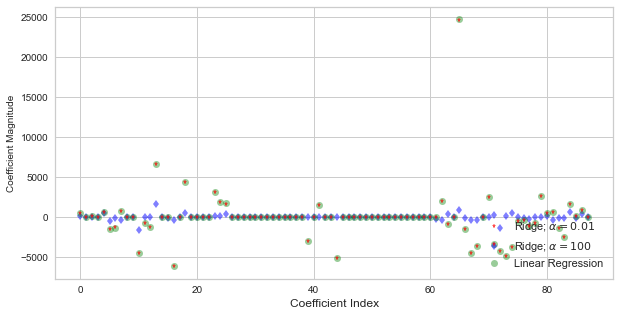

In [105]:
#plotting LR and Ridge regression scores
import matplotlib
matplotlib.rcParams.update({'font.size': 12})
X_train, X_test, y_train, y_test = train_test_split(Xp, yp, test_size=.25, random_state=0) #split the data in to test and train with test size at 25%
print( len(X_test), len(y_test)) #checking to see if the data lengths are same
lr = LinearRegression() #initializing the LinearRegression
lr.fit(X_train, y_train) #fitting the train data to LR
rr = Ridge(alpha=0.01)  #setting the alpha to 0.01 (hyper parameter)
# higher the alpha value, more restriction on the coefficients; low alpha > more generalization
rr.fit(X_train, y_train) #using ridge to fit the training data
rr100 = Ridge(alpha=100) #  comparison with alpha value at 100
rr100.fit(X_train, y_train) #fitting the ridge at 100
train_score=lr.score(X_train, y_train) #train scoring of x and y values for LR
test_score=lr.score(X_test, y_test) #testing score of x and y values for LR
Ridge_train_score = rr.score(X_train,y_train) ##train scoring of x and y values for Ridge at alpha 0.01
Ridge_test_score = rr.score(X_test, y_test)#testing score of x and y values for Ridge at apha 0.01
Ridge_train_score100 = rr100.score(X_train,y_train)##train scoring of x and y values for Ridge at alpha 100
Ridge_test_score100 = rr100.score(X_test, y_test)#testing score of x and y values for Ridge at apha 100
plt.plot(rr.coef_,alpha=0.7,linestyle='none',marker='*',markersize=5,color='red',label=r'Ridge; $\alpha = 0.01$',zorder=7) #plot the alpha 0.1 for ridge
plt.plot(rr100.coef_,alpha=0.5,linestyle='none',marker='d',markersize=6,color='blue',label=r'Ridge; $\alpha = 100$') #plot the coefs with alpth at 100 for ridge
plt.plot(lr.coef_,alpha=0.4,linestyle='none',marker='o',markersize=7,color='green',label='Linear Regression')#plot the coefs for LR
plt.xlabel('Coefficient Index',fontsize=12) #plot xlabel
plt.ylabel('Coefficient Magnitude',fontsize=10)#plot ylabel
plt.legend(fontsize=11,loc=4) #legend for the plot
plt.show() #show the plot

### X axis we plot the coefficient index for 12 features
### When α =0.01 coefficients are less restricted and coefficients are same as of LR 
### For α =100 coefficient indices 7,8,9,10 less compared to LR

Training score is  0.6209544639364323
Test score is  0.5758669243418286
Number of features used are  41
Training score for alpha=0.01 is  0.6209746497513919
Test score for alpha =0.01 is  0.5728970928493532
Number of features used for alpha =0.01: 42


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 60294692.469350815, tolerance: 2008686.6612644738
  positive)


Training score for alpha=0.0001  0.6209746517952135
Test score for alpha =0.0001   0.5728763724115706
Number of features used: for alpha =0.0001  43
LR training score is  0.6209746517954187
LR test score is  0.5730159405943104


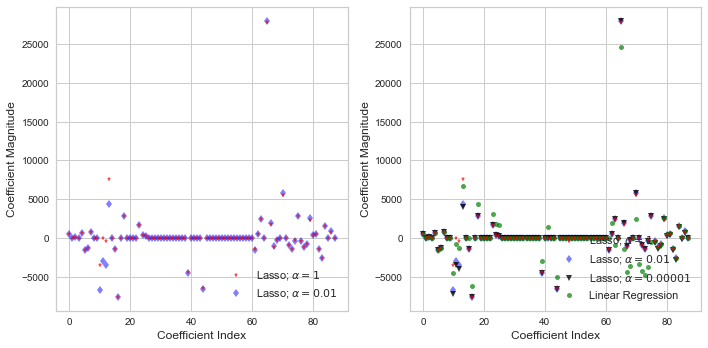

In [106]:
#hyper parameters influence on Lasso and LR
# lasso and ridge regression coefficients can be zero (used less features) (dimensinality reduction too)
X_train, X_test, y_train, y_test = train_test_split(Xp, yp, test_size=.25, random_state=0) #split the data in to test and train with test size at 25%
lasso = Lasso() #initializing the Lasso
lasso.fit(X_train,y_train) #fitting the train data to lasso
train_score=lasso.score(X_train,y_train) #getting the score to lasso train
test_score=lasso.score(X_test,y_test) #getting the score to lasso test
coeff_used = np.sum(lasso.coef_!=0) #use all the coefs that are not zero
print ("Training score is ", train_score ) #printing the training score
print ( "Test score is ", test_score) #printing the trest score
print ("Number of features used are ", coeff_used) #print coefs used in the lasso coefs scores evalution
lasso001 = Lasso(alpha=0.01, max_iter=10e5) #setting the lasso alpha to start at 0.01 to max of 10e5
lasso001.fit(X_train,y_train) #fitting the lasso train at alpha set a 0.01
train_score001=lasso001.score(X_train,y_train)#lasso score for train at 0.01 alpha
test_score001=lasso001.score(X_test,y_test)#lasso score for test at 0.01 alpha
coeff_used001 = np.sum(lasso001.coef_!=0) #use all the coefs that are not zero for alpha 0.01
print ("Training score for alpha=0.01 is ", train_score001 )#printing the train scores for alpha 0.01
print( "Test score for alpha =0.01 is ", test_score001) #printing the score for test score for alpha  0.01
print ("Number of features used for alpha =0.01:", coeff_used001) #number of features used for alpha  0.01
lasso00001 = Lasso(alpha=0.0001, max_iter=10e5)#setting the lasso alpha to start at 0.0001 to max of 10e5
lasso00001.fit(X_train,y_train)#fitting the lasso train at alpha set a 0.0001
train_score00001=lasso00001.score(X_train,y_train)#lasso score for train at 0.0001 alpha
test_score00001=lasso00001.score(X_test,y_test)#lasso score for test at 0.0001 alpha
coeff_used00001 = np.sum(lasso00001.coef_!=0)#use all the coefs that are not zero for alpha 0.0001
print ("Training score for alpha=0.0001 ", train_score00001 )#printing the train scores for alpha 0.0001
print ("Test score for alpha =0.0001  ", test_score00001)#printing the score for test score for alpha  0.0001
print ("Number of features used: for alpha =0.0001 ", coeff_used00001) #number of features used for alpha  0.0001
lr = LinearRegression() #Initialize LR
lr.fit(X_train,y_train) #fit LR to train
lr_train_score=lr.score(X_train,y_train) #score LR on train data
lr_test_score=lr.score(X_test,y_test)#score LR to trest
print ("LR training score is ", lr_train_score )#print LR train score
print ("LR test score is ", lr_test_score) #print LR test score
plt.subplot(1,2,1) #subplot 1 row two columns first column value
plt.plot(lasso.coef_,alpha=0.7,linestyle='none',marker='*',markersize=5,color='red',label=r'Lasso; $\alpha = 1$',zorder=7) # plot lasso coefs
plt.plot(lasso001.coef_,alpha=0.5,linestyle='none',marker='d',markersize=6,color='blue',label=r'Lasso; $\alpha = 0.01$') # plot lasso coefs at 0.01

plt.xlabel('Coefficient Index',fontsize=12) #xlable set
plt.ylabel('Coefficient Magnitude',fontsize=12) #y lable set
plt.legend(fontsize=11,loc=4) #legend
plt.subplot(1,2,2) #plot size for 2nd column
plt.plot(lasso.coef_,alpha=0.7,linestyle='none',marker='*',markersize=5,color='red',label=r'Lasso; $\alpha = 1$',zorder=7) #  # plot lasso coefs
plt.plot(lasso001.coef_,alpha=0.5,linestyle='none',marker='d',markersize=6,color='blue',label=r'Lasso; $\alpha = 0.01$') #  # plot lasso coefs at 0.01
plt.plot(lasso00001.coef_,alpha=0.8,linestyle='none',marker='v',markersize=6,color='black',label=r'Lasso; $\alpha = 0.00001$') #  # plot lasso coefs at 0.0001
plt.plot(lr.coef_,alpha=0.7,linestyle='none',marker='o',markersize=5,color='green',label='Linear Regression',zorder=2)
plt.xlabel('Coefficient Index',fontsize=12)
plt.ylabel('Coefficient Magnitude',fontsize=12)
plt.legend(fontsize=11,loc=4)
plt.tight_layout()
plt.show()



### Comparing the Lasso to Ridge the score is at 79% to 59%
### For this data set I would prefer to use Ridge LR going fwd

In [107]:
## NN prediction of price using Keras/TF

In [108]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train) #scaling the datasets of train
X_test = sc.transform(X_test) #scaling the datasets of test

In [109]:
from keras.models import Sequential #sequential reg from keras
from keras.layers import Dense #dense layers from keras
from keras.wrappers.scikit_learn import KerasRegressor 
from matplotlib import pyplot as plt #matplot lib
import warnings
warnings.filterwarnings('ignore')

# define base model
def baseline_model():
    # create model
    model = Sequential() #sequential model
    model.add(Dense(30, input_dim=88, kernel_initializer='normal', activation='relu')) #with 30 nodes and 88 inputs features
    model.add(Dense(output_dim = 88, init = 'uniform', activation = 'relu')) #hidden1 layers taking the same features
    model.add(Dense(output_dim = 88, init = 'uniform', activation = 'relu')) #hidden2 layers taking the same features
    model.add(Dense(1, kernel_initializer='normal')) #output layer
    # Compile model
    model.compile(loss='mse',
                optimizer='adam',
                metrics=['mae'] ) #compiling the model
    return model

model = baseline_model() #calling the above function
model.summary() #get summary of the network

Using TensorFlow backend.


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 30)                2670      
_________________________________________________________________
dense_2 (Dense)              (None, 88)                2728      
_________________________________________________________________
dense_3 (Dense)              (None, 88)                7832      
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 89        
Total params: 13,319
Trainable params: 13,319
Non-trainable params: 0
_________________________________________________________________


In [110]:
from __future__ import absolute_import, division, print_function #function for printing and divisions

import tensorflow as tf #importing tensor flow
from tensorflow import keras #importing keras

EPOCHS = 500 #initializing the total EPOCHS

# Store training stats
history = model.fit(X_train, y_train, epochs=EPOCHS,
                    validation_split=0.2, verbose=0) #fitting the model with train dataset

In [127]:

import tensorflow_docs as tfdocs
import tensorflow_docs.plots


In [128]:
plotter = tfdocs.plots.HistoryPlotter(smoothing_std=2)


Text(0, 0.5, 'MAE [Price]')

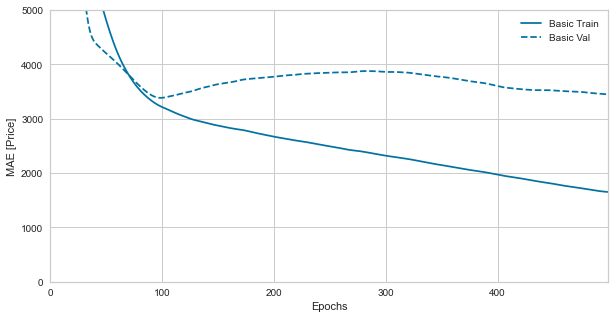

In [129]:
#visualize the model’s training progress using the stats stored in the history object
plotter.plot({'Basic': history}, metric = "mae")
plt.ylim([0, 5000])
plt.ylabel('MAE [Price]')

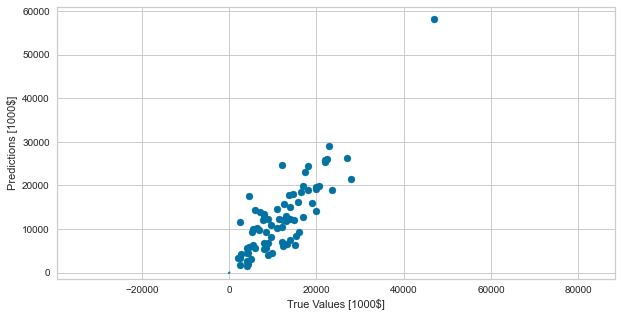

In [111]:
test_predictions = model.predict(X_test).flatten() #preditct the model using test data set

plt.scatter(y_test, test_predictions) #plotting actual test data set and predicted data set
plt.xlabel('True Values [1000$]')
plt.ylabel('Predictions [1000$]')
plt.axis('equal')
plt.xlim(plt.xlim())
plt.ylim(plt.ylim())
_ = plt.plot([-100, 100], [-100, 100])

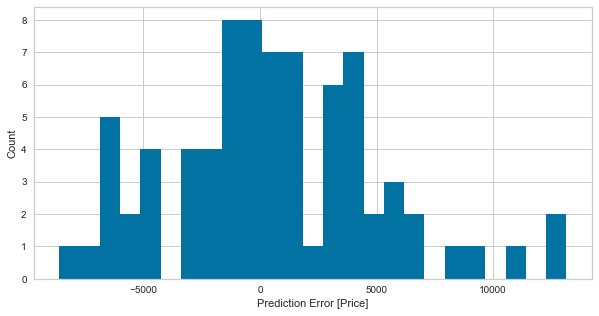

In [145]:
#error distribution
error = test_predictions - y_test #getting the error distribution for prediction and test datasets
plt.hist(error, bins = 25)
plt.xlabel("Prediction Error [Price]")
_ = plt.ylabel("Count")

In [133]:
n=((np.sqrt(test_predictions - y_test)))

In [134]:
n = n[np.logical_not(np.isnan(n))]

In [135]:
error = np.sum(n)

In [137]:
error/len(df_clean) #percentage of errors to the total dataset

1.0729040961004561

In [138]:
from sklearn.metrics import r2_score

In [139]:
r2_score(y_test, test_predictions) #r squared value

0.6311369123659673